In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

treino = treino.drop(columns=['media_receita','media_despesa','nome', 'sequencial_candidato'])

In [45]:
numeric_feats = treino.dtypes[treino.dtypes != "object"].index

numeric_feats = numeric_feats.drop('ano')
numeric_feats = numeric_feats.drop('situacao')

treino[numeric_feats] = np.log1p(treino[numeric_feats])

teste[numeric_feats] = np.log1p(teste[numeric_feats])

In [46]:
treino_X = treino.loc[:,:'ocupacao']
treino_Y = treino.loc[:,'situacao']

In [47]:
treino_X = pd.get_dummies(treino_X)

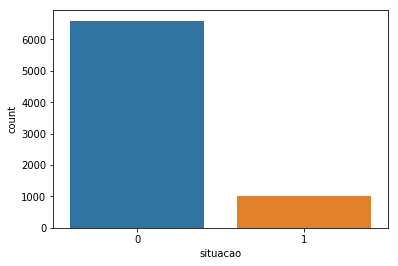

In [48]:
sns.countplot(treino_Y)

É clara a diferença entre a quantidade de instâncias da classe nao_eleito e eleito. Isso pode levar o modelo a aprender de forma errada a classificar os exemplos de teste.

Para balancear as classes usarei a técnica de under-sampling, cluser centroids.

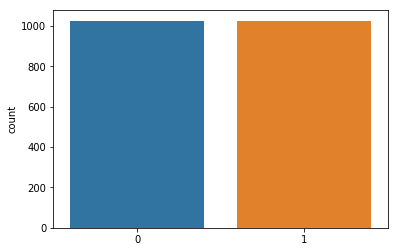

In [50]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
x_cc, y_cc = cc.fit_sample(treino_X, treino_Y)

sns.countplot(y_cc)

Com a mesma quantidade de instâncias entre as duas classes, a chance de o modelo sofrer de unerfiting é bem menor.

A seguir inicio o treinamento de alguns modelos a partir dos dados filtrados.

## Regressão Logística

In [54]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model, inputs, outputs):
    rmse= np.sqrt(-cross_val_score(model, inputs, outputs, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [61]:
from sklearn.linear_model import LogisticRegression

lambdas = np.arange(0.1,10,0.5).tolist()
cv_logRegression = [rmse_cv(LogisticRegression(C=l, random_state=1, solver="lbfgs", max_iter=10000),x_cc,y_cc).mean() 
            for l in lambdas]

cv_logRegression = pd.Series(cv_ridge, index = lambdas)

NameError: name 'plt' is not defined

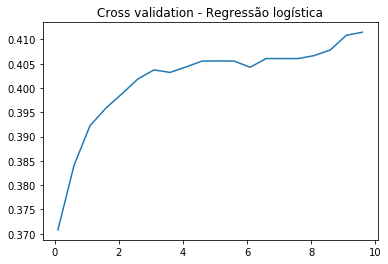

In [62]:
cv_logRegression.plot(title = "Cross validation - Regressão logística")
plt.xlabel("lambda")
plt.ylabel("rmse")
plt.show()